# 线性回归

**线性模型就是对输入特征加权求和，再加上一个常数偏置项(也叫截距项)。**


**公式4-1：线性回归模型预测**
$$
\hat y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n
$$
- $\hat y$是预测值
- n是特征的数量
- $x_i$是第i个特征值
- $\theta_j$是第j个模型参数


**公式4-2：线性回归模型预测（向量化）**
$$
\hat y = h_{\theta}(X) = \theta^T \cdot X
$$
- $\theta$是模型的参数向量
- $\theta^T$是$\theta$的转置向量
- X是实例的特征向量
- $\theta^T \cdot X$是$\theta^T$和$X$的点积
- $h_\theta$是使用模型参数$\theta$的假设函数


回归模型最常见的性能指标是均方根误差（RMSE）。因此，在训练线性回归模型时，你需要找到最小化RMSE的$\theta$值。在实践中，最小化均方误差（MSE）比最小化RMSE更简单。

**公式4-3：线性回归模型的MSE成本函数**
$$
MSE(X, h_\theta) = \frac 1 m \sum_{i=1}^{m} (\theta^T \cdot X^{(i)} - y^{(i)})^2
$$

## 标准方程

为了得到使成本函数最小的$\theta$值，有一个闭式解方法

**公式4-4：标准方程**
$$
\hat \theta = (X^T \cdot X)^{-1} \cdot X^T \cdot y
$$
- $\hat \theta$是使成本函数最小的$\theta$值
- y是包含$y^{(1)}$到$y^{(m)}$的目标值向量


In [1]:
# 测试方程
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

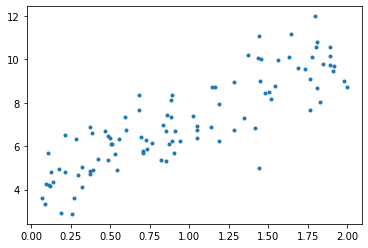

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X, y, marker='.')
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[4.14724986]
 [3.05415516]]


我们期待的是$\theta_0=4$,$\theta_1=3$，得到的是$\theta_0=3.7$,$\theta_1=3.1$。非常接近，噪声的存在使得其不可能完全还原为原本的函数。

现在可以用$\hat \theta$做出预测：

In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print(y_predict)

[[ 4.14724986]
 [10.25556018]]


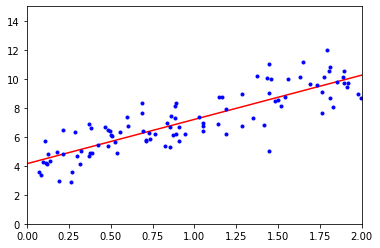

In [5]:
# 绘制模型的预测结果
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
# Scikit-learn的等效代码如下
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_, lin_reg.coef_)

lin_reg.predict(X_new)

[4.14724986] [[3.05415516]]


array([[ 4.14724986],
       [10.25556018]])

## 计算复杂度

标准方程求逆的矩阵$X^T \cdot X$，是一个$n \times n$矩阵（n是特征数量）。对这种矩阵求逆的计算复杂度通常为$O(n^{2.4})$到$O(n^{3})$之间（取决于计算实现）。换句话说，如果将特征数量翻倍，那么计算时间将乘以大约$2^{2.4}=5.3$倍到$2^{3}=8$倍之间。

好的一面是，相对于训练集中的实例数量(O(m))来说，方程是线性的。

# 梯度下降

应用梯度下降时，需要保证所有特征值的大小比例差不多，否则收敛的时间会长很多。

训练模型也就是搜寻使成本函数（在训练集上）最小化的参数组合。这是模型*参数空间*层面上的搜索：模型的参数越多，这个空间的维度就越多，搜索就越难。

## 批量梯度下降

要实现梯度下降，你需要计算每个模型关于参数$\theta_j$的成本函数的梯度。换言之，你需要计算的时如果改变$\theta_j$，成本函数会改变多少。这被称为*偏导数*。

公式4-5：成本函数的偏导数
$$
\frac {\partial MSE(\theta)} {\partial \theta_j} = \frac 2 m \sum_{i=1}^m (\theta^T \cdot x^{(i)} - y^{(i)})x_j^{(i)}
$$

如果不想单独计算这些梯度，可以使用公式4-6对其进行一次性计算。梯度向量，记作$\nabla_{\theta}MSE(\theta)$，包含所有成本函数（每一个模型参数一个）的偏导数。

公式4-6：成本函数的梯度向量
$$
\nabla_{\theta} MSE(\theta) = 
$$

批量梯度下降：每一步都使用整批训练数据。

一旦有了梯度向量，哪个点向上，就朝反方向下坡。也就是从$\theta$中减去$\nabla_{\theta}MSE(\theta)$，这时学习率$\eta$就发挥作用了：用梯度向量乘以$\eta$确定下坡步长的大小。

公式4-7：梯度下降步长
$$
\theta^{(next step)} = \theta - \eta \nabla_{\theta}MSE(\theta)
$$

In [7]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2, 1)  # random initiazation

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
print(theta)

[[4.14724986]
 [3.05415516]]


**怎么选择学习率？**

可以用网格搜索

**怎么限制迭代次数？**

在开始时设置一个非常大的迭代次数，但是当梯度向量的值变得很微小时中断算法——也就是相当于它的范数变得低于$\varepsilon$（称为容差）时，因为这时梯度下降已经（几乎）达到了最小值。


**收敛率**

成本函数为凸函数，并且斜率没有陡峭的变化时（如MSE成本函数），通过批量梯度下降可以看出一个固定的学习率有一个收敛率，为$0(\frac 1 {迭代次数})$。换句话说，如果将容差$\varepsilon$缩小为原来的1/10（以得到更精确的解），算法将不得不运行10倍的迭代次数。

## 随机梯度下降

由于算法的随机性质，它比批量梯度下降要不规则得多。
成本函数将不再是缓缓降直到抵达最小值，而是不断上上下下，但是从整体来看，还是缓慢下降。
但即使它到达了最小值，依然还会持续反弹，永远不会停止。所以算法停下来的参数值肯定是足够好的，但不是最优的。
当成本函数非常不规则时，随机梯度下降其实可以帮助算法跳出局部最小值，所以相比批量梯度下降，它对找到全局最小值更有优势。

因此，随机性的好处在于可以跳出局部最优，缺点是永远定位不出最小值。
一个折中的办法是：逐步降低学习率。这个过程叫做*模拟退火*。

In [8]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters


def learning_schedule(t):
    return t0 / (t + t1)


theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients

print(theta)

[[4.22478822]
 [3.03073677]]


## 小批量梯度下降

介于批量梯度下降和随机梯度下降之间，每次选择一定数量的实例计算梯度。

**线性回归算法比较**

|算法|实例很多|是否支持核外|特征很多|超参数|是否需要缩放|
|--- |--- | ---      |--- |---   |---      |
|标准方程|快|否|慢|0|否|
|批量梯度下降|慢|否|快|2|是|
|随机梯度下降|快|是|快|>=2|是|
|小批量梯度下降|快|是|快|>=2|是|


## 多项式回归

如果数据比简单的直线更为复杂，怎么办？

令人意想不到的是，其实你也可以用线性模型来拟合非线性数据。

一个简单的方法就是将每个特征的幂次方添加为一个新特征，然后在这个拓展过的特征集上训练线性模型。这种方法被称为*多项式回归*。


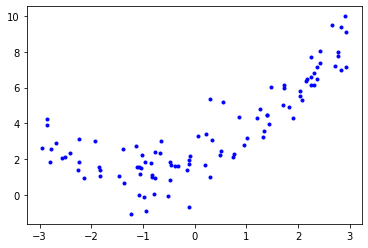

In [9]:
# 制造非线性数据
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, 'b.')
plt.show()

In [10]:
# 解释如https://www.cnblogs.com/liweiwei1419/p/9715702.html
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X) 

print(X[0])
print(X_poly[0])

[-1.82758059]
[-1.82758059  3.34005082]


In [11]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([1.93814065]), array([[1.02307052, 0.46200413]]))

因此，预估模型$\hat y = 0.46x_1^2 + 1.02x_1 + 1.93$，而实际上原函数是$y = 0.5x^2 + 1.0x + 2.0 + 高斯噪声$

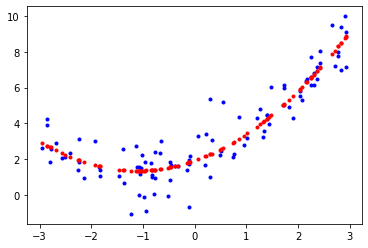

In [17]:
y_pred = 0.46 * X ** 2 + 1.02 * X + 1.93

plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r.')
plt.show()

## 学习曲线

对于上一个例子，如果用300阶的模型拟合数据，可能会严重的过拟合，如果线性模型则会拟合不足。这个案例中泛化最好的是二次模型。

但一般来说，你不会知道生成数据的函数是什么，那么该如何确定模型的复杂程度呢？怎么才能判断模型是过拟合还是欠拟合呢？

其中一种方法是交叉验证来评估模型的泛化性能，还有一种方法是*观察学习曲线*：这个曲线绘制的是模型在训练集和验证集上，关于“训练集大小”的性能函数。要生成这个曲线，只需要在不同大小的训练子集上多次训练模型即可。

In [21]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
    plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
    plt.axis([0, 80, 0, 3])


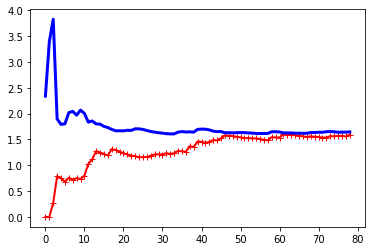

In [19]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

 这条学习曲线是典型的模型拟合不足。两条曲线均到达高地，非常接近，而且相当高。

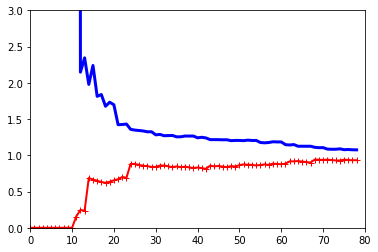

In [22]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline((
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('sgd_reg', LinearRegression()),
    ))
plot_learning_curves(polynomial_regression, X, y)

对比可知：
- 训练数据的误差远低于线性回归模型。
- 两条曲线之间有一定差距。这正是过拟合的标志。

**偏差/方差权衡**

模型的泛化误差可以被表示为三个截然不同的误差之和：

*偏差*

这部分泛化误差的原因在于错误的假设，比如假设数据是线性的，而实际上是二次的。高偏差模型最有可能对训练数据拟合不足。

*方差*

这部分误差是由于模型对训练数据的微小变化过度敏感导致的。具有高自由度的模型（例如高阶多项式模型）很可能也有高方差，所以很容易对训练数据过度拟合。

*不可避免的误差*

这部分误差是因为数据本身的噪声所致。减少这部分误差的唯一方法就是清理数据（例如修复数据源，如损坏的传感器，或者是检测平移除异常值）。

增加模型的复杂度通常会显著提升模型的方差，减少偏差。反过来，降低模型的复杂度则会提升模型的偏差，降低方差。这就是为什么称其为权衡。


# 正则线性模型

对线性模型来说，正则化通常通过约束模型的权重来实现。

## 岭回归